In [1]:
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
qr = QuantumRegister(4) #create 4 Qubit
cr = ClassicalRegister(4) #create 4 classical bit to measure qubit
qc = QuantumCircuit(qr, cr) #create Quantum Circuit

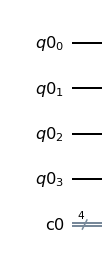

In [3]:
%matplotlib inline
qc.draw(output='mpl') # draw current quantum circuit

In [4]:
def make_entanglement(qc, a, b): #make quantum entanglement between qubit 'a' and qubit 'b'
    qc.h(a)
    qc.cx(a, b)

In [5]:
def make_communicate(qc, a, b): #to communicate the status of qubit
    qc.cx(a, b)
    qc.h(a)

In [6]:
make_entanglement(qc, 0, 1)
make_entanglement(qc, 2, 3)
qc.barrier()

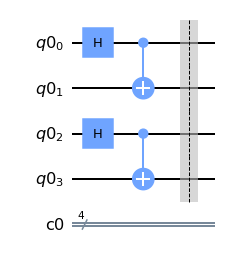

In [7]:
qc.draw(output='mpl')

In [8]:
make_communicate(qc, 1, 2)

In [9]:
def measure_pair(qc, a, b):
    qc.measure(a, a)
    qc.measure(b, b)

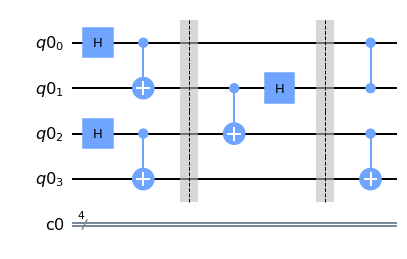

In [10]:
qc.barrier()
qc.cz(1, 0) # add controlled Z gate to convert to the appropriate state
qc.cx(2, 3) # add CNOT gate to convert to the appropriate state
qc.draw(output='mpl')

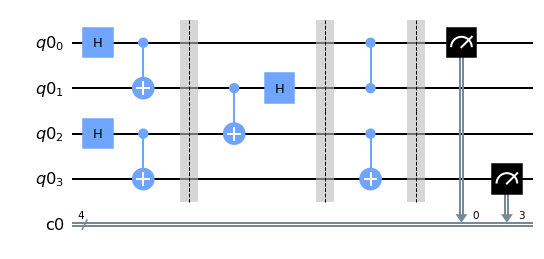

In [11]:
qc.barrier()
measure_pair(qc, 0, 3) #measure first and last qubit to confirm that the protocol is successful
qc.draw(output='mpl')

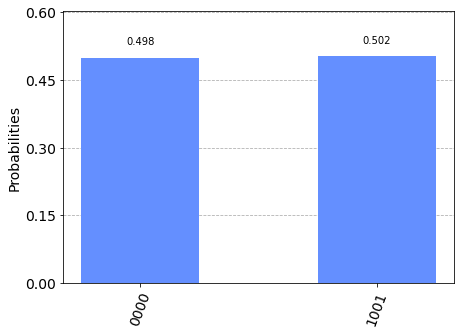

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc)) # print the result to a histogram to confirm measurement status

In [13]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [14]:
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp) # execute quantum circuit on IBM Quantum machine
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


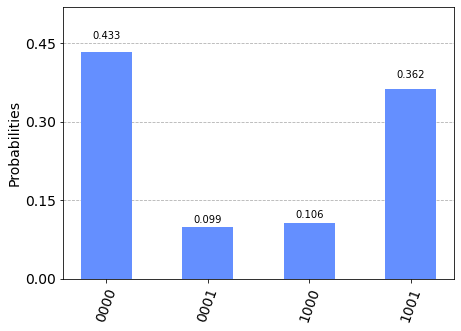

In [15]:
result = job.result()
plot_histogram(result.get_counts(qc)) # print the result on real Quantum machine 

In [16]:
counts = result.get_counts(qc)
print(f"The experimental error rate : {(1 - (counts['0000'] + counts['1001'])/sum(counts.values())) * 100 :.3f}%")
#print error rate in the real Quantum Hardware

The experimental error rate : 20.508%
